In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Will it rain today in Australia?

In [2]:
#Data Collection 
# Dataset from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/code

df = pd.read_csv('Dataset/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.dropna()

df.reset_index(inplace=True, drop = True)


In [7]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
df.drop(columns=['RainTomorrow','Date'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Temp9a

In [10]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No
56416,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No
56417,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No
56418,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No


# Encoding

In [11]:
#Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df

<ipython-input-11-fe7a4d081544>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'] = le.fit_transform(df['RainToday'])


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0
56416,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0
56417,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0
56418,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0


# Analysis of features

<AxesSubplot:>

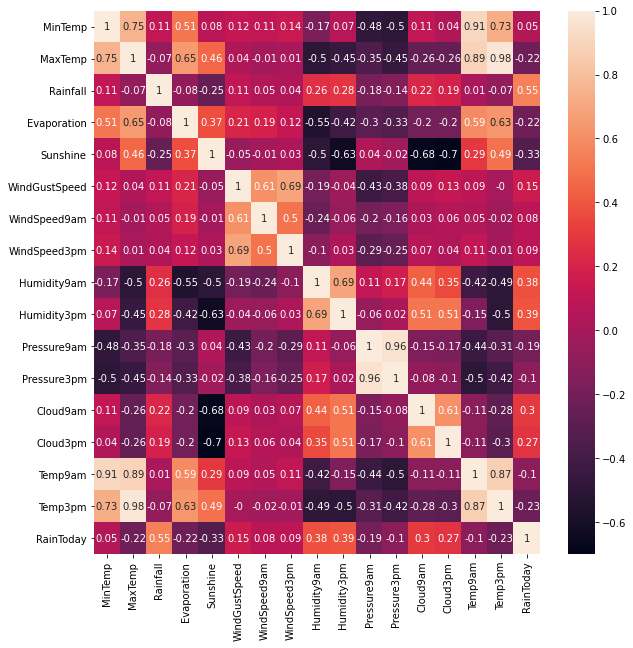

In [12]:
plt.figure(figsize=(10,10))
correlation = df.corr().round(2)
sns.heatmap(data = correlation, annot= True)

# One Hot Encoder

In [13]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoderFunction(columnName, column):
    oh = OneHotEncoder(dtype =np.int32) # create instance of OHE 
    dfn = df[[columnName]] 
    dfn = oh.fit_transform(dfn).toarray() # fit transform column into a matrix then append to an array
    dfn = pd.DataFrame(dfn, columns = column)
    return dfn




In [14]:
Location_col = df['Location'].unique()
dfn = OneHotEncoderFunction("Location", Location_col)
df = pd.concat([df,dfn],axis=1)
df.drop(columns=['Location'],inplace = True)

In [15]:
WindGustDir_col = df['WindGustDir'].unique()
dfn = OneHotEncoderFunction("WindGustDir", WindGustDir_col)
df = pd.concat([df,dfn],axis=1)
df.drop(columns=['WindGustDir'],inplace = True)

In [16]:
WindDir9am_col = df['WindDir9am'].unique()
dfn = OneHotEncoderFunction("WindDir9am", WindDir9am_col)
df = pd.concat([df,dfn],axis=1)
df.drop(columns=['WindDir9am'],inplace = True)

In [17]:
WindDir3pm_col = df['WindDir3pm'].unique()
dfn = OneHotEncoderFunction("WindDir3pm", WindDir3pm_col)
df = pd.concat([df,dfn],axis=1)
df.drop(columns=['WindDir3pm'],inplace = True)

In [18]:
first_column = df.pop('RainToday')
  
# insert column using insert(position,column_name,first_column) function
df.insert(0, 'RainToday', first_column)
df

,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,ENE,N,SE,NNE,NW,E,ESE,NE,SSW,W
0,0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,...,0,0,0,0,0,0,1,0,0,0
1,0,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,...,0,0,0,0,1,0,0,0,0,0
2,0,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,...,1,0,0,0,0,0,0,0,0,0
3,0,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,...,0,0,0,0,0,0,0,0,0,1
4,0,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,0,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,...,0,0,0,0,0,0,0,0,0,0
56416,0,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,...,0,0,0,1,0,0,0,0,0,0
56417,0,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,...,0,0,0,0,0,0,0,1,0,0
56418,0,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 91 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RainToday         56420 non-null  int32  
 1   MinTemp           56420 non-null  float64
 2   MaxTemp           56420 non-null  float64
 3   Rainfall          56420 non-null  float64
 4   Evaporation       56420 non-null  float64
 5   Sunshine          56420 non-null  float64
 6   WindGustSpeed     56420 non-null  float64
 7   WindSpeed9am      56420 non-null  float64
 8   WindSpeed3pm      56420 non-null  float64
 9   Humidity9am       56420 non-null  float64
 10  Humidity3pm       56420 non-null  float64
 11  Pressure9am       56420 non-null  float64
 12  Pressure3pm       56420 non-null  float64
 13  Cloud9am          56420 non-null  float64
 14  Cloud3pm          56420 non-null  float64
 15  Temp9am           56420 non-null  float64
 16  Temp3pm           56420 non-null  float6

# Selecting the data

In [20]:

X = df.iloc[:, 1:].values #everything except first column
y = df.iloc[:, 0].values # first column


# Training the model

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0) # training size accuracy = 1 - test size


In [22]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [23]:
# trying another scaling method 
from sklearn.preprocessing import MinMaxScaler 
mms = MinMaxScaler()
X_train_scaled_MM = sc.fit_transform(X_train)
X_test_scaled_MM = sc.transform(X_test)

# Logistic Regression

In [25]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200, random_state=0)
model.fit(X_train, y_train)
score = model.score(X_train, y_train)

print("Training score: {:.3f}".format(score))
score = model.score(X_test, y_test)
print("Testing score: {:.3f}".format(score))

Training score: 0.998
Testing score: 0.998


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Scaling

In [25]:
#Standard scaling
model.fit(X_train, y_train)
score = model.score(X_train_scaled, y_train)

print("Scaled: (Standard)")
print("Training score: {:.3f}".format(score))
score = model.score(X_test_scaled, y_test)
print("Testing score: {:.3f}".format(score))

Scaled: (Standard)
Training score: 0.957
Testing score: 0.955


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#Min Max scaling
model.fit(X_train, y_train)
score = model.score(X_train_scaled_MM, y_train)

print("Scaled: (Min Max)")
print("Training score: {:.3f}".format(score))
score = model.score(X_test_scaled_MM, y_test)
print("Testing score: {:.3f}".format(score))

Scaled: (Min Max)
Training score: 0.957
Testing score: 0.955


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Tuning (LR)

In [27]:
#grid search
from sklearn.model_selection import GridSearchCV
grid_values = {
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'penalty': ['none', 'l2'],
    'C':[0.001, 0.01, 1, 10, 100]}
gsLR = GridSearchCV(model, param_grid = grid_values,scoring = 'precision', n_jobs=-1)
gsLR_fit = gsLR.fit(X_train, y_train)
#5 min pc
#13 mins laptop
# Setting penalty='none' will ignore the C and parameters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [28]:
print("Grid Search")
print("Best parameters: ", gsLR.best_params_)
print("with model accuracy: {:.3f}".format(gsLR.best_score_))

Grid Search
Best parameters:  {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
with model accuracy: 1.000


In [31]:
#randomized search
from sklearn.model_selection import RandomizedSearchCV
grid_values = {
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'penalty': ['none', 'l2'],
    'C':[0.001, 0.01, 1, 10, 100]}
rsLR = RandomizedSearchCV(model, grid_values, scoring = 'precision', n_iter=200, n_jobs=-1)
rsLR.fit(X_train, y_train)
#5 mins

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 30 is smaller than n_iter=200. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=0),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 1, 10, 100],
                                        'penalty': ['none', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'sag']},
                   scoring='precision')

In [32]:
print("Random Search")
print("Best parameters: ", rsLR.best_params_)
print("With model accuracy: {:.3f}".format(rsLR.best_score_))

Random Search
Best parameters:  {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.001}
With model accuracy: 1.000


# Best hyperparameters:

- solver: newton-cg, 
- penalty: none, 
- C: NA

Found by grid search and random search
- Random Search found results in faster time

In [26]:
#creating model with optimal parameters.
model_LR_Tuned = LogisticRegression(max_iter=200, random_state=0, penalty='none', solver='newton-cg')
model_LR_Tuned.fit(X_train, y_train)
score = model.score(X_train, y_train)

# Evaluation (LR)

In [27]:
from sklearn.metrics import confusion_matrix
'''Creating a confusion matrix for each model'''
def matrix(y_test, X_test, model):
    y_test_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_test_pred)
    label_name = ["True Negative", "False Positive", "False Negative", "True Positive"]
    simplify_num = [num for num in cfm.flatten()]
    percentage =[f"{p:.2%}" for p in cfm.flatten()/np.sum(cfm)]
    group = [f"{a}\n{b}\n{c}" for a,b,c in zip(label_name, simplify_num, percentage)] #grouping labels with zip
    group = np.array(group).reshape(2,2)
    sns.heatmap(cfm, annot=group,cmap='Blues', fmt="")
    


In [28]:
# Calculate the overall model's accuracy on the whole dataset.
from sklearn.model_selection import cross_val_score
'''Cross validation function for each model'''
def crossValScore(model, X, y):
    scores = cross_val_score(model,X,y,cv=5,scoring='accuracy', n_jobs=-1)
    print(scores)
    avg = scores.mean()
    print('Avg. cross Validation model accuracy',avg)


# Confusion matrix

Logistic regression, untuned parameters: confusion matrix. 


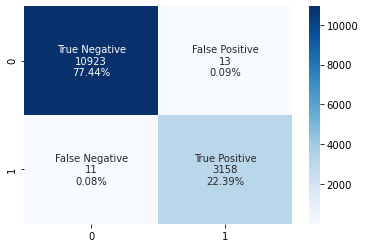

In [36]:
print("Logistic regression, untuned parameters: confusion matrix. ")
matrix(y_test, X_test, model)

Logistic regression, Tuned parameters: confusion matrix.


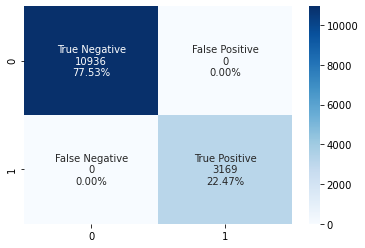

In [37]:
print("Logistic regression, Tuned parameters: confusion matrix.")
matrix(y_test, X_test, model_LR_Tuned)

- Untuned model has 99.83% accuracy, nearly perfect
- Tuned model has no false negatives or false positives, Perfect accuracy.

# Classification Report

In [29]:
from sklearn.metrics import classification_report
print ("Logistic Regression")
y_test_pred = model_LR_Tuned.predict(X_test)
target_names = ['Yes', 'No']
cReport = classification_report(y_test, y_test_pred, target_names=target_names)
print(cReport)

Logistic Regression
              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00     10936
          No       1.00      1.00      1.00      3169

    accuracy                           1.00     14105
   macro avg       1.00      1.00      1.00     14105
weighted avg       1.00      1.00      1.00     14105



- Perfect scores for the Tuned model

# Cross validation

In [39]:
print("Cross validation for untuned model")
crossValScore(model, X, y)

Cross validation for untuned model
[0.99973414 0.99574619 0.99920241 0.99946827 0.99867068]
Avg. cross Validation model accuracy 0.9985643388869196


In [40]:
print("Cross validation for tuned model")
crossValScore(model_LR_Tuned, X, y)

Cross validation for tuned model
[1.         1.         1.         0.99991138 1.        ]
Avg. cross Validation model accuracy 0.9999822757887273


- Both model average CV scores are over 99% 
- Higher average Cross validation model accuracy for the tuned model

# K Nearest Neighbour

In [30]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier() # default neighbours = 5 test this
modelKNN.fit(X_train, y_train)
accuracy = modelKNN.score(X_train, y_train)
print("Training score: {:.3f}".format(accuracy))
accuracy = modelKNN.score(X_test, y_test)
print("Testing score: {:.3f}".format(accuracy))


Training score: 0.921
Testing score: 0.887


# Scaled models

In [42]:
#scaled
print("Standard Scaled")
modelKNN.fit(X_train, y_train)
accuracy = modelKNN.score(X_train_scaled, y_train)
print("Training score: {:.3f}".format(accuracy))
accuracy = modelKNN.score(X_test_scaled, y_test)
print("Testing score: {:.3f}".format(accuracy))

Standard Scaled
Training score: 0.220
Testing score: 0.225


In [43]:
print("Min-max Scaled")
accuracy = modelKNN.score(X_train_scaled_MM, y_train)
print("Training score: {:.3f}".format(accuracy))
accuracy = modelKNN.score(X_test_scaled_MM, y_test)
print("Testing score: {:.3f}".format(accuracy))

Min-max Scaled
Training score: 0.220
Testing score: 0.225


# Model Tuning (KNN)

Optimal number of neighbours:  9
Best accuracy:  0.873


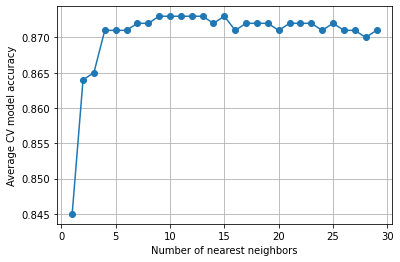

In [44]:
#Applying Cross validation to each neighbour to find the most optimal Neighbour
xaxis = []
yaxis= []
scores_check = -1
for i in range(1, 30):
    model_KNN = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    xaxis.append(i)
    scores = cross_val_score(model_KNN,X,y,cv=2,scoring='accuracy')
    yaxis.append(round(scores.mean(), 3))
    if round(scores.mean(), 3) > scores_check: 
        scores_check = round(scores.mean(), 3)
        best_neighbour = i

plt.plot(xaxis,yaxis, marker ="o")
plt.xlabel("Number of nearest neighbors")
plt.ylabel("Average CV model accuracy")
plt.grid()
print("Optimal number of neighbours: ", best_neighbour)
print("Best accuracy: ", scores_check)
#18 mins

In [31]:
weight_list = ["uniform", "distance"]
k_list = list(range(1,30))
para_grid = dict(n_neighbors=k_list)
print(para_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


# Grid search

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid = GridSearchCV(modelKNN, para_grid,cv=2,scoring="accuracy",return_train_score=False, n_jobs=6)
grid.fit(X,y)
#10 mins no jobs

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [36]:
print("grid search")
pd.DataFrame(grid.cv_results_)[["mean_test_score","params"]]

grid search


,mean_test_score,params
0,0.844700,{'n_neighbors': 1}
1,0.864463,{'n_neighbors': 2}
2,0.865083,{'n_neighbors': 3}
3,0.870666,{'n_neighbors': 4}
4,0.870844,{'n_neighbors': 5}
5,0.871482,{'n_neighbors': 6}
6,0.872492,{'n_neighbors': 7}
7,0.871943,{'n_neighbors': 8}
8,0.873059,{'n_neighbors': 9}
9,0.873166,{'n_neighbors': 10}


Best model accuracy: 0.873
best value: {'n_neighbors': 11}


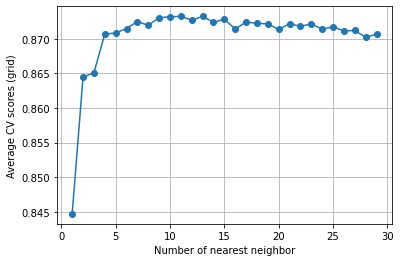

In [37]:
plt.plot(k_list, grid.cv_results_["mean_test_score"], marker ="o")
plt.xlabel("Number of nearest neighbor")
plt.ylabel("Average CV scores (grid)")
plt.grid()
print("Best model accuracy: {:.3f}".format(grid.best_score_))
print("best value:", grid.best_params_)

- Graph shows best accuracy of model: 87.3%.
- achieved with 11 neighbours.

In [39]:
print("random search")
rand = RandomizedSearchCV(modelKNN,para_grid,cv=2,scoring="accuracy",return_train_score=False, n_iter=30, random_state=0, n_jobs=6)
rand.fit(X,y)


random search


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 29 is smaller than n_iter=30. Running 29 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29]},
                   random_state=0, scoring='accuracy')

Best model accuracy: 0.873
best value: {'n_neighbors': 11}


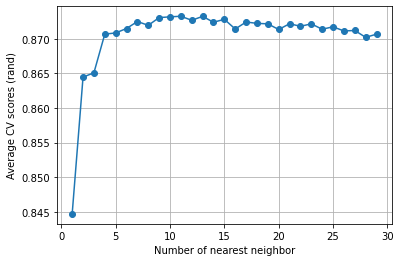

In [40]:
plt.plot(k_list, rand.cv_results_["mean_test_score"], marker ="o")
plt.xlabel("Number of nearest neighbor")
plt.ylabel("Average CV scores (rand)")
plt.grid()
print("Best model accuracy: {:.3f}".format(rand.best_score_))
print("best value:", rand.best_params_)

- Graph shows best accuracy of model: 87.3%.
- achieved with 11 neighbours.
- random search algorithm solved faster.

# Evaluation (KNN)

In [41]:
#create the tuned model with best parameters
model_tunedKNN = KNeighborsClassifier(n_neighbors=11)
model_tunedKNN.fit(X_train, y_train)

print("Tuned KNN model")
accuracy = model_tunedKNN.score(X_train, y_train)
print("Training score: {:.3f}".format(accuracy))
accuracy = model_tunedKNN.score(X_test, y_test)
print("Testing score: {:.3f}".format(accuracy))

Tuned KNN model
Training score: 0.907
Testing score: 0.890


# Confusion Matrix

K Nearest Neighbor, untuned parameters: confusion matrix.


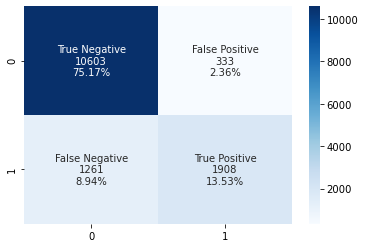

In [42]:
print("K Nearest Neighbor, untuned parameters: confusion matrix.")
matrix(y_test, X_test, modelKNN)

K Nearest Neighbour, Tuned parameters: confusion matrix. 


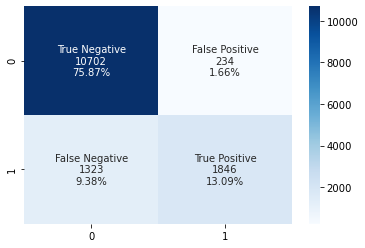

In [43]:
print("K Nearest Neighbour, Tuned parameters: confusion matrix. ")
matrix(y_test, X_test, model_tunedKNN)

Untuned model has 88.70% accuracy, very high accuracy.

Tuned model an accuracy of 88.96%, slightly higher than untuned model, very high accuracy.

Tuned model has:
- increased true negatives,
- reduced true positives,
- reduced false positives,
- increased false negatives.

(relative to the untuned model.)

Classification Report

In [44]:
print ("K Nearest Neighbour")
y_test_pred = model_tunedKNN.predict(X_test)
target_names = ['Yes', 'No']
cReport = classification_report(y_test, y_test_pred, target_names=target_names)
print(cReport)

K Nearest Neighbour
              precision    recall  f1-score   support

         Yes       0.89      0.98      0.93     10936
          No       0.89      0.58      0.70      3169

    accuracy                           0.89     14105
   macro avg       0.89      0.78      0.82     14105
weighted avg       0.89      0.89      0.88     14105



- Tuned model shows weak recall for classifying features as "No".
- Strong recall for classifying features as "Yes".
- this may be because there are less features that are classified as "No".

# Cross validation

In [45]:
print("KNN Cross validation untuned: ")
crossValScore(modelKNN, X, y)


KNN Cross validation untuned: 
[0.87593052 0.86254874 0.86901808 0.88691953 0.89498405]
Avg. cross Validation model accuracy 0.8778801843317972


In [46]:
print("KNN Cross validation tuned: ")
crossValScore(model_tunedKNN, X, y)

KNN Cross validation tuned: 
[0.87690535 0.86839773 0.87096774        nan 0.89808579]
Avg. cross Validation model accuracy nan


Average cross validation of the tuned model is higher at 88%.

# Conclusion

Both models succeed in classifying if there will be rain tommorow.


- The Logistic regression model was the better model with a perfect accuracy when tuned.

- KNN was had high accuracies of 89% (when tuned)

# END